# Running a YOLOv4 Object Detector with Darknet in the Cloud! (GPU ENABLED)
This tutorial will help you build YOLOv3 easily in the cloud with GPU enabled so that you can run object detections in milliseconds!

# Step 1: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's repository and then build darknet.



In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 2.58 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# Step 2: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 101-ielts-speaking-part-two-tasks.pdf
 123.docx
 1-s2.0-0001616073900643-main.pdf
 2509401072.pdf
'3_D model for solids undergoing stress-induced phase  transformations.pdf'
'A145_Calc (1).exe'
'A145_Calc (2).exe'
 A145_Calc.exe
'A 3-D model describing stress-temp. induced solid phase transformations_solution algo. and bvps_F Auricchio.pdf'
 ABInBev.jpg
'Aircraft_Structures_3E(s).pdf'
 all_chapter_ver_xeror_28.docx
 all_chapter_ver_xeror_28-pages-deleted.pdf
 all_chapter_ver_xeror_28.pdf
 amatrix12.m
 Amatrix.m
 Answer_Comments_PlosOne_COvidPandemic_Paper.gdoc
 assigment5.m
 ASSIGNMENT3v2prem.m
'assignment 7-flight mechanics.docx'
 average_based_di_question.docx
 average_based_questions.docx
'Ballistic impact response of Kevlar® reinforced thermoplastic composite armors.pdf'
'Batch wise list.gsheet'
'beams and plates matlab codes'
 bfm%3A978-1-4613-8919-4%2F1.pdf
'by Vaij.pdf'
 C++
 calcualtion_based.docx
 Cambridge-IELTS-10.pdf
'Cambridge IELTS 10 Student’s Book with Answers by coll.

In [8]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


# Step 3: Moving Your Custom Datasets Into Your Cloud VM

Move the datasets from the google drive to cloud VM to train and validate the model. 
Training dataset folder with the images and corresponding text files are named as 'obj' and then zip folder is created. 
Similarly for validation data, images and text files are named as 'test' and then test.zip is created. 

These have to be unzipped ans put in Cloud VM.



In [24]:
# this is where my datasets are stored within my Google Drive (I created a yolov3 folder to store all important files for custom training) 
!ls /mydrive/yolov3
!ls /mydrive/yolov4

 backup					  obj.names
'Copy of Copy of YOLOv3_Tutorial.ipynb'   obj.zip
'Copy of YOLOv3_Tutorial.ipynb'		  test.zip
 generate_test.py			  YOLOv3andv4Submission_EagleView.ipynb
 generate_train.py			  yolov3_custom2.cfg
 obj.data
 backup
'Copy of Copy of YOLOv4_Training_Tutorial.ipynb'
 generate_test.py
 generate_train.py
 obj.data
 obj.names
 obj.zip
 test.zip
 yolov4-obj.cfg
 YOLOv4Submission_EagleView.ipynb


In [10]:
# copy over both datasets into the root directory of the Colab VM 
!cp /mydrive/yolov3/obj.zip ../
!cp /mydrive/yolov3/test.zip ../

In [11]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/image_000000001.jpg  
  inflating: data/obj/image_000000001.txt  
  inflating: data/obj/image_000000002.jpg  
  inflating: data/obj/image_000000002.txt  
  inflating: data/obj/image_000000003.jpg  
  inflating: data/obj/image_000000003.txt  
  inflating: data/obj/image_000000004.jpg  
  inflating: data/obj/image_000000004.txt  
  inflating: data/obj/image_000000005.jpg  
  inflating: data/obj/image_000000005.txt  
  inflating: data/obj/image_000000006.jpg  
  inflating: data/obj/image_000000006.txt  
  inflating: data/obj/image_000000007.jpg  
  inflating: data/obj/image_000000007.txt  
  inflating: data/obj/image_000000008.jpg  
  inflating: data/obj/image_000000008.txt  
  inflating: data/obj/image_000000009.jpg  
  inflating: data/obj/image_000000009.txt  
  inflating: data/obj/image_000000010.jpg  
  inflating: data/obj/image_000000010.txt  
  inflating: data/obj/image_000000011.jpg  
  inflating: data/obj/image_000000011.txt  
  inflating

# Step 4: Configuring Files for Training
This step involves properly configuring your .cfg, obj.data, obj.names, train.txt and test.txt files.



## i) Cfg File
Copying over the yolov3.cfg to my Google Drive by running the cell below so that it can be edited in text editor

In [26]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom2.cfg ./cfg
!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg

In [13]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

## iii) Generating train.txt and test.txt
The last configuration files needed before we can begin to train our custom detector are the train.txt and test.txt files which hold the relative paths to all our training images and valdidation images.

Luckily I have created scripts that eaily generate these two files withe proper paths to all images.

The scripts can be accessed from the [Github Repo](https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial)

Just download the two files to your local machine and upload them to your Google Drive so we can use them in the Colab Notebook.

In [18]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./
!cp /mydrive/yolov3/generate_test.py ./

Now simply run both scripts to do the work for you of generating the two txt files.

In [19]:
!python generate_train.py
!python generate_test.py

In [20]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


# Step 5a: Download pre-trained weights for the convolutional layers for Yolov3.
Instead of randomly initializing weights, the weights specified below would help object detector to be more accurate and to have less training time.

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

# Step 5b: Download pre-trained weights for the convolutional layers for Yolov4.
Instead of randomly initializing weights, the weights specified below would help object detector to be more accurate and to have less training time.

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# Step 6a: Train Your Custom Object Detector for Yolov3!
I am ready to train custom YOLOv3 object detector. 
Information about the flags:
(-dont_show flag stops chart from popping up since Colab Notebook can't open images on the spot
-map flag overlays mean average precision on chart to see how accuracy of your model is. Work only if validation dataset is provided.




In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show -map

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [ ]:
# If training gets stuck in between, weights are saved so that training can kick off again. 

!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights -dont_show

# Step 6b: Train Your Custom Object Detector for Yolov4!
I am ready to train custom YOLOv4 object detector. 
Information about the flags:
(-dont_show flag stops chart from popping up since Colab Notebook can't open images on the spot
-map flag overlays mean average precision on chart to see how accuracy of your model is. Work only if validation dataset is provided.




In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map


 To observe the chart of how model did throughout the training process.It is a plot of loss vs. iterations. 

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [ ]:
# If training gets stuck in between, weights are saved so that training can kick off again. 

!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show 

# Step 7a: To explicitly check Mean Average Precision (mAP) of Your Model for Yolov3
Run the following command on any of the saved weights from the training to see the mAP value for that specific weight's file. 

In [21]:
!./darknet detector map data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights 

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

# Step 7b: To explicitly check Mean Average Precision (mAP) of Your Model for Yolo v4
Run the following command on any of the saved weights from the training to see the mAP value for that specific weight's file. 

In [27]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights 

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

# Step 8a: Run Your Custom Object Detector on Test Images for Yolo v3


In [22]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

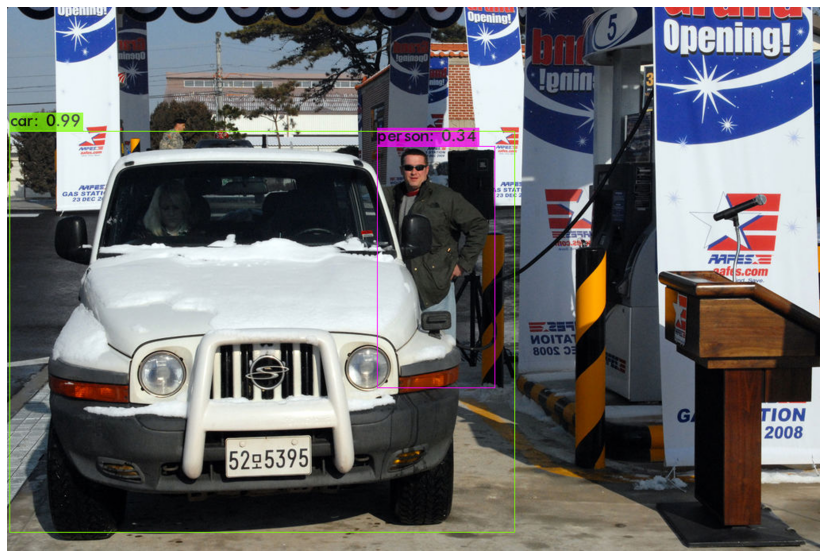

In [23]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights /mydrive/images/image_000002239.jpg -thresh 0.3
imShow('predictions.jpg')

# Step 8b: Run Your Custom Object Detector on Test Images for Yolo v4


In [28]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

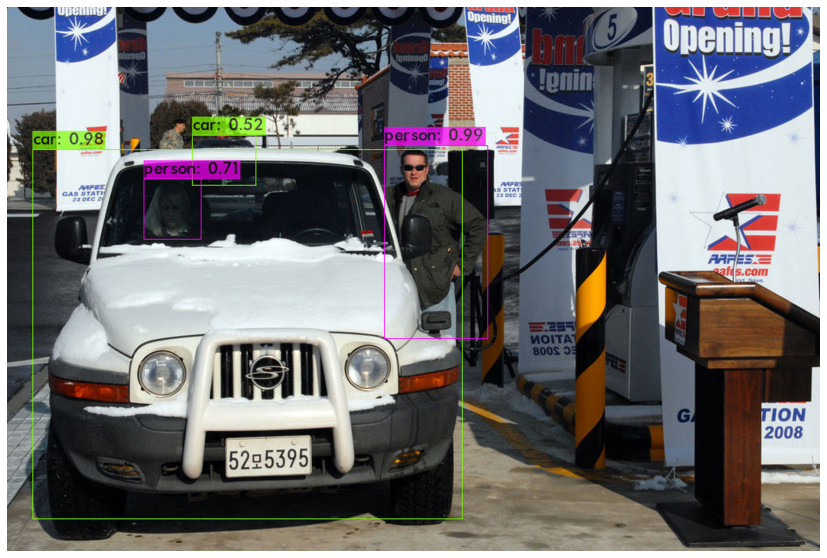

In [29]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/images/image_000002239.jpg -thresh 0.3
imShow('predictions.jpg')